In [1]:
# -*- coding:utf-8 -*-
# 使用逻辑回归对信用卡欺诈进行分类
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [2]:
# 混淆矩阵可视化
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    
    # 显示颜色尺度计
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
# 显示模型评估结果
def show_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('精确率: {:.3f}'.format(tp/(tp+fp)))
    print('召回率: {:.3f}'.format(tp/(tp+fn)))
    print('F1值: {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))))

In [4]:
# 绘制精确率-召回率曲线
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show();

In [32]:
# 1、数据加载
data = pd.read_csv('/Users/zhangqihao/Desktop/PYTHON/机器学习/信用卡/creditcard.csv')

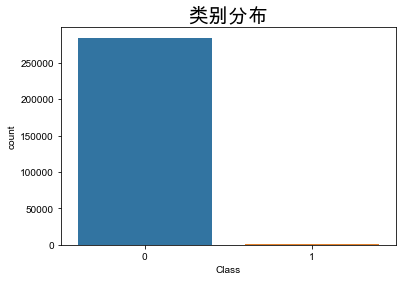

总交易笔数:  284807
诈骗交易笔数： 492
诈骗交易比例：0.172749%


In [33]:
# 2、数据探索/可视化

# print(data.describe())
# 设置plt正确显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 绘制类别分布
figure = sns.countplot(x = 'Class', data = data)
plt.title('类别分布', fontsize =20)
plt.show()

# 显示交易笔数，欺诈交易笔数
num = len(data)
num_fraud = len(data[data['Class']==1]) 
print('总交易笔数: ', num)
print('诈骗交易笔数：', num_fraud)
print('诈骗交易比例：{:.6f}%'.format(num_fraud/num*100))

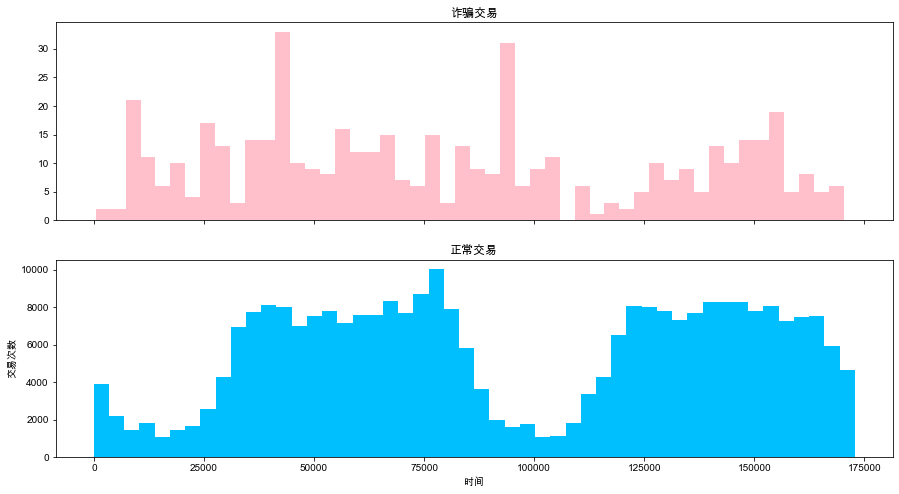

In [25]:
# 欺诈和正常交易可视化
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,8))

ax1.hist(data.Time[data.Class == 1], bins = 50, color = 'pink')
ax1.set_title('诈骗交易')

ax2.hist(data.Time[data.Class == 0], bins = 50, color = 'deepskyblue')
ax2.set_title('正常交易')

plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

# 对Amount进行数据规范化
data['Amount_Norm'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [29]:
# 3、数据划分
data = data.drop(['Time','Amount','Class'],axis=1)

# 2维数据转化
y = np.array(data.Class.tolist())

# 3维数据转化
x = np.array(data.as_matrix())

# 准备训练集和测试集
x_train, x_test, y_train, y_test = train_test_split (X, y, test_size = 0.1, random_state = 33)

[0 0 0 ... 0 0 0]


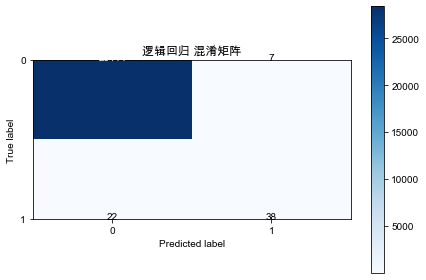

精确率: 0.844
召回率: 0.633
F1值: 0.724


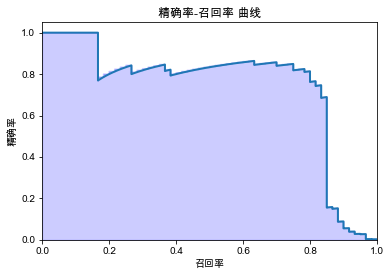

In [31]:
#4、逻辑回归分类

estimator = LogisticRegression()
estimator.fit(x_train, y_train)
y_predict = estimator.predict(x_test)

# 若使用线性SVC
# from sklearn import svm
# estimator = svm.LinearSVC
# estimator.fit(x_train, y_train)

# 预测样本的置信分数
y_score = estimator.decision_function(x_test) 

# 计算混淆矩阵，并显示
cm = confusion_matrix(y_test, y_predict)
class_names = [0,1]
# 显示混淆矩阵
plot_confusion_matrix(cm, classes = class_names, title = '逻辑回归 混淆矩阵')
# 显示模型评估分数
show_metrics()
# 计算精确确率，召回率，阈值用于可视化
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()